# Exploring the DSS Dataset

In [7]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from tf.app import use

A = use('dss', hoist=globals())

	connecting to online GitHub repo annotation/app-dss ... failed
The offline TF-app may not be the latest
Using TF-app in /Users/cody/text-fabric-data/annotation/app-dss/code:
	rv0.4=#6f0198838fa9339fc85e23551bd83d61e4bbaaa7 (latest? release)
	connecting to online GitHub repo etcbc/dss ... failed
The offline data may not be the latest
Using data in /Users/cody/text-fabric-data/etcbc/dss/tf/0.4:
	rv0.4=#dbdfeb914b510aa5bed5425b5b3096521e8b35c2 (latest? release)
	connecting to online GitHub repo etcbc/dss ... failed
The offline data may not be the latest
Using data in /Users/cody/text-fabric-data/etcbc/dss/parallels/tf/0.4:
	rv0.4=#dbdfeb914b510aa5bed5425b5b3096521e8b35c2 (latest? release)


### Simple function for barplots

In [9]:
def countBarplot(count_df, 
                 title='', 
                 column='Total', 
                 reverse_labels=False, 
                 size=(8, 6),
                 xlab_rotation=None,
                 ylim=None,
                 save=None,
                 xlabel=None,
                ):
    '''
    Makes simple barplot from collections.Counter type objects.
    '''
    n_bars = list(range(0, count_df.shape[0]))
    x_labels = [''.join(reversed(prep)) for prep in count_df.index] if reverse_labels else count_df.index
    plt.figure(figsize=size)
    sns.barplot(n_bars, count_df[column], color='darkblue')
    plt.xticks(n_bars, x_labels, size=18, rotation=xlab_rotation)
    plt.yticks(size=18)
    if ylim:
        plt.ylim(top=ylim[0], bottom=ylim[1])
    if xlabel:
        plt.xlabel(xlabel,size=18)
    plt.ylabel(column, size=18)    
    if save:
        plt.savefig(save, dpi=300, bbox_inches='tight')
    plt.title(title, size=18,  y=1.05)
    plt.show()

## Get a Break-down of Biblical vs. Non-Biblical Compositions

,N-Words
NA,492675
1,13840
2,14


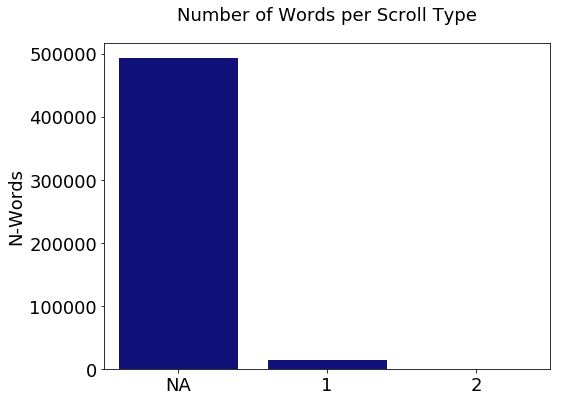

In [16]:
canoncounts = collections.Counter()

for word in F.otype.s('word'):
    biblical = F.biblical.v(word) or 'NA'
    canoncounts[biblical] += 1
    
canoncounts = pd.DataFrame.from_dict(canoncounts, orient='index')
# canoncounts.index = ['Non-Biblical', 'Partially Biblical', 'Biblical']
canoncounts.columns = ['N-Words']
canoncounts = canoncounts.sort_values(by='N-Words', ascending=False)

display(canoncounts)
countBarplot(canoncounts, column='N-Words', title='Number of Words per Scroll Type')

In [21]:
[(sc, F.scroll.v(sc)) for sc in F.otype.s('scroll') if F.scroll.v(sc).startswith('1Q')]

[(1605865, '1QS'),
 (1605866, '1QSa'),
 (1605867, '1QSb'),
 (1605868, '1QpHab'),
 (1605869, '1QM'),
 (1605870, '1QHa'),
 (1605871, '1Q14'),
 (1605872, '1Q15'),
 (1605873, '1Q16'),
 (1605874, '1Q17'),
 (1605875, '1Q18'),
 (1605876, '1Q19'),
 (1605877, '1Q19bis'),
 (1605878, '1Q20'),
 (1605879, '1Q21'),
 (1605880, '1Q22'),
 (1605881, '1Q23'),
 (1605882, '1Q24'),
 (1605883, '1Q25'),
 (1605884, '1Q26'),
 (1605885, '1Q27'),
 (1605886, '1Q29'),
 (1605887, '1Q30'),
 (1605888, '1Q31'),
 (1605889, '1Q32'),
 (1605890, '1Q34bis'),
 (1605891, '1Q35'),
 (1605892, '1Q36'),
 (1605893, '1Q37'),
 (1605894, '1Q38'),
 (1605895, '1Q39'),
 (1605896, '1Q40'),
 (1605897, '1Q41'),
 (1605898, '1Q42'),
 (1605899, '1Q43'),
 (1605900, '1Q44'),
 (1605901, '1Q45'),
 (1605902, '1Q46'),
 (1605903, '1Q47'),
 (1605904, '1Q49'),
 (1605905, '1Q50'),
 (1605906, '1Q51'),
 (1605907, '1Q52'),
 (1605908, '1Q53'),
 (1605909, '1Q54'),
 (1605910, '1Q55'),
 (1605911, '1Q56'),
 (1605912, '1Q57'),
 (1605913, '1Q58'),
 (1605914, '1Q

In [31]:
from pprint import pprint

In [34]:
isa = L.d(1606609, 'word')

bib_mark = collections.Counter()

for word in isa:
    bib_mark[F.biblical.v(word)] += 1
        
print(f'len isa {len(isa)}')
bib_mark.most_common()

len isa 24372


[(0, 22499), (1, 1579), (None, 294)]